In [1]:
%matplotlib inline
''' Python Tools '''
import numpy as np
np.set_printoptions(suppress=True) # Changes print functionality
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

'''PyTorch Functionality'''
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

'''Landscape Class'''
from Protein_Landscape.landscape_class import Protein_Landscape

'''Dataset Management'''
Datasets = 'Data'


In [2]:
test = Protein_Landscape(csv_path=Datasets+"/NK/K0/V0.csv",gen_graph=True)

Building Protein Graph for entire dataset


 10%|█         | 10263/100000 [00:00<00:01, 51415.69it/s]

Calculating the number of extrema


100%|██████████| 100000/100000 [00:01<00:00, 54807.92it/s]



        Protein Landscape class
            Number of Sequences : 100000
            Max Distance        : 5
            Number of Distances : 6
            Seed Sequence       : AAAAA
                Modified positions are shown in green
            Number of minima : 1
            Number of maxima : 1
            Normalized Extrema Ruggedness : 2e-05
            R/S Ruggedness : 30.205840273418666
        


In [3]:
test.graph_to_networkx()

100%|██████████| 100000/100000 [01:56<00:00, 857.53it/s]


In [4]:
G = test.networkx_graph

In [5]:
import networkx as nx

nx.write_graphml(G, "Test_Graph.graphml")

In [24]:
 
G = nx.Graph()

G.add_node("A", attr_dict={'age':45, 'gender':'male'})

G.nodes(data=True)

NodeDataView({'A': {'attr_dict': {'age': 45, 'gender': 'male'}}})

In [14]:
import networkx as nx
G = nx.Graph()
G.add_node('Bob', {'age':45, 'gender':'male'})
G.node['Bob']['age']

G.add_node('Sara', age=40, gender = 'female')
G.node['Sara']['age']

G.node['Sara']['gender']


TypeError: add_node() takes 2 positional arguments but 3 were given

In [3]:
def mc_criterion(state1, state2, T):
        preference_for_state2 = 1 - (1 / (1 + np.exp((state2 - state1) * T)))
        #print(np.array([1-preference_for_state2, preference_for_state2]).reshape(-1,))
        return np.array([1-preference_for_state2, preference_for_state2]).reshape(-1,)

In [8]:
indices = test.evolved_trajectory_data(num_steps=1000,T=70,mc_criterion=mc_criterion,initial_seq=(0,0,1,2,4))
res = []
[res.append(x) for x in indices if x not in res] 

test.fitnesses[np.array(indices)]

array([0.4025161027845906, 0.4222419054544966, 0.4222419054544966, ...,
       0.8908514309696445, 0.8908514309696445, 0.8908514309696445],
      dtype=object)

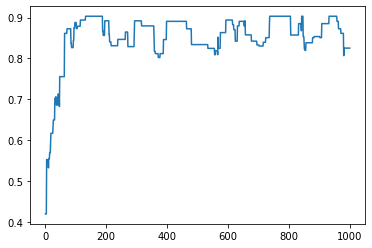

In [7]:
import matplotlib.pyplot as plt

plt.plot(test.fitnesses[np.array(indices)])

In [103]:
np.where(np.all(np.array((0,0,0,0,1)) == test.tokenized[:,:-1],axis=1))

(array([1]),)

In [32]:
test.graph[[(0,0,0,0,0),(0,0,0,1,0)]]

TypeError: unhashable type: 'list'

In [27]:
test.graph[(0,0,0,0,0)]

[37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9]

In [20]:
tuple(test.tokenized[40,:-1])

(4, 0, 0, 0, 0)

In [21]:
import random

In [26]:
random.choice(test.graph[seq])

33

In [ ]:
[[].extend(test.graph[test.tokenized[id,:-1]]) for id in idxs[d-1]

In [39]:
d = 1
idxs = [[0,1]]
temp = [test.graph[tuple(test.tokenized[id,:-1])] for id in idxs[d-1]]
[item for sublist in temp for item in sublist]

[37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 532,
 568,
 604,
 640,
 676,
 712,
 748,
 784,
 820,
 289,
 316,
 343,
 370,
 397,
 424,
 451,
 478,
 505,
 127,
 145,
 163,
 181,
 199,
 217,
 235,
 253,
 271,
 46,
 55,
 64,
 73,
 82,
 91,
 100,
 109,
 118,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9]

In [99]:
state1 = 0
state2 = 1
T = 1

def f(x):
    return 1 - (1 / (1 + np.exp(T*x)))

odds = f(state2 - state1)
print(odds)
su = 0
for i in range(1000):
    choice = np.random.choice([state1,state2],p=[1-odds,odds])
    su += choice
    
print(su)

0.7310585786300049
744


In [109]:
a = np.array([[0,0,0],[0,0,1],[0,0,2]])

np.where(np.all(a == np.array([0,0,0]),axis=1))

(array([0]),)

In [8]:
a = np.array([[0,0,0],[0,0,1],[0,0,2]])
import itertools
list(zip(a,itertools.count()))

[(array([0, 0, 0]), 0), (array([0, 0, 1]), 1), (array([0, 0, 2]), 2)]